In [3]:
import requests

# Lebron James player ID
url = "https://www.balldontlie.io/api/v1/players"
params = {"search":"Lebron James"}
response = requests.get(url, params=params)
response.json()

{'data': [{'id': 237,
   'first_name': 'LeBron',
   'height_feet': 6,
   'height_inches': 8,
   'last_name': 'James',
   'position': 'F',
   'team': {'id': 14,
    'abbreviation': 'LAL',
    'city': 'Los Angeles',
    'conference': 'West',
    'division': 'Pacific',
    'full_name': 'Los Angeles Lakers',
    'name': 'Lakers'},
   'weight_pounds': 250}],
 'meta': {'total_pages': 1,
  'current_page': 1,
  'next_page': None,
  'per_page': 25,
  'total_count': 1}}

In [4]:
# Kyrie Irving player ID
url = "https://www.balldontlie.io/api/v1/players"
params = {"search":"Kyrie Irving"}
response = requests.get(url, params=params)
response.json()

{'data': [{'id': 228,
   'first_name': 'Kyrie',
   'height_feet': 6,
   'height_inches': 3,
   'last_name': 'Irving',
   'position': 'G',
   'team': {'id': 7,
    'abbreviation': 'DAL',
    'city': 'Dallas',
    'conference': 'West',
    'division': 'Southwest',
    'full_name': 'Dallas Mavericks',
    'name': 'Mavericks'},
   'weight_pounds': 193}],
 'meta': {'total_pages': 1,
  'current_page': 1,
  'next_page': None,
  'per_page': 25,
  'total_count': 1}}

In [5]:
# Kyrie Irving player ID 228
# Lebron James player ID 237
import pandas as pd

url = "https://www.balldontlie.io/api/v1/stats"
params = {
    "player_ids[]": 228,  
    "seasons[]": [2015, 2016, 2017]  
}


all_stats = []

# While loop to handle pagination
while True:
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        all_stats.extend(data['data'])  

       
        if data["meta"]["next_page"]:
            params["page"] = data["meta"]["next_page"]
        else:
            break
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        break


kyrie_irving_df = pd.DataFrame(all_stats)


kyrie_irving_df.head()

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,game,min,oreb,pf,player,pts,reb,stl,team,turnover
0,751834,4.0,0.0,1.0,1.000,2.0,2.0,0.417,12.0,5.0,...,"{'id': 29073, 'date': '2015-12-20T00:00:00.000...",17:04,0.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",12.0,1.0,2.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",1.0
1,751873,2.0,0.0,0.0,0.333,3.0,1.0,0.417,12.0,5.0,...,"{'id': 32605, 'date': '2016-01-08T00:00:00.000...",27:00,2.0,3.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",13.0,2.0,0.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",4.0
2,751926,2.0,0.0,0.0,0.000,6.0,0.0,0.267,15.0,4.0,...,"{'id': 27417, 'date': '2015-12-25T00:00:00.000...",26:14,3.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",13.0,3.0,1.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",2.0
3,752548,4.0,0.0,0.0,0.000,1.0,0.0,0.143,7.0,1.0,...,"{'id': 32023, 'date': '2015-12-23T00:00:00.000...",18:57,1.0,2.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",5.0,1.0,0.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",2.0
4,753112,2.0,0.0,1.0,0.286,7.0,2.0,0.438,16.0,7.0,...,"{'id': 27419, 'date': '2015-12-28T00:00:00.000...",24:10,0.0,0.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",22.0,1.0,1.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",1.0


In [6]:
import pandas as pd

url = "https://www.balldontlie.io/api/v1/stats"
params = {
    "player_ids[]": 237,  
    "seasons[]": [2015, 2016, 2017]  
}


all_stats = []

# While loop to handle pagination
while True:
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        all_stats.extend(data['data'])  

       
        if data["meta"]["next_page"]:
            params["page"] = data["meta"]["next_page"]
        else:
            break
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        break


lebron_james_df = pd.DataFrame(all_stats)


lebron_james_df.head()

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,game,min,oreb,pf,player,pts,reb,stl,team,turnover
0,785018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"{'id': 33965, 'date': '2016-12-14T00:00:00.000...",None,NaN,NaN,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",NaN,NaN,NaN,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",NaN
1,741148,5.0,0.0,10.0,0.2,5.0,1.0,0.545,22.0,12.0,...,"{'id': 31090, 'date': '2015-10-27T00:00:00.000...",36:04,0.0,3.0,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",25.0,10.0,1.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",1.0
2,741512,5.0,0.0,6.0,0.0,3.0,0.0,0.308,13.0,4.0,...,"{'id': 31093, 'date': '2015-10-28T00:00:00.000...",30:48,1.0,1.0,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",12.0,7.0,3.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",3.0
3,741865,4.0,0.0,3.0,0.0,2.0,0.0,0.684,19.0,13.0,...,"{'id': 28882, 'date': '2015-10-30T00:00:00.000...",33:56,2.0,3.0,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",29.0,5.0,1.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",4.0
4,742383,11.0,2.0,9.0,0.0,3.0,0.0,0.474,19.0,9.0,...,"{'id': 28664, 'date': '2015-11-02T00:00:00.000...",33:20,0.0,3.0,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",22.0,9.0,4.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",3.0


In [7]:
# Extracting 'id' and 'date' from the 'game' column and create new columns
lebron_james_df['id'] = lebron_james_df['game'].apply(lambda g: g['id'] if pd.notnull(g) else None)
lebron_james_df['date'] = lebron_james_df['game'].apply(lambda g: g['date'] if pd.notnull(g) else None)

# Drop the original 'game' column 
lebron_james_df = lebron_james_df.drop('game', axis=1)

# Define the order of your columns starting with 'id' and 'date'
column_order = ['id', 'date'] + [col for col in lebron_james_df if col not in ['id', 'date']]

lebron_james_df = lebron_james_df[column_order]

# Do the same for Kyrie Irving

# Extracting 'id' and 'date' from the 'game' column and create new columns
kyrie_irving_df['id'] = kyrie_irving_df['game'].apply(lambda g: g['id'] if pd.notnull(g) else None)
kyrie_irving_df['date'] = kyrie_irving_df['game'].apply(lambda g: g['date'] if pd.notnull(g) else None)

# Drop the original 'game' column 
kyrie_irving_df = kyrie_irving_df.drop('game', axis=1)

# Define the order of your columns starting with 'id' and 'date'
column_order = ['id', 'date'] + [col for col in kyrie_irving_df if col not in ['id', 'date']]

kyrie_irving_df = kyrie_irving_df[column_order]

kyrie_irving_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ftm,min,oreb,pf,player,pts,reb,stl,team,turnover
0,29073,2015-12-20T00:00:00.000Z,4.0,0.0,1.0,1.000,2.0,2.0,0.417,12.0,...,0.0,17:04,0.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",12.0,1.0,2.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",1.0
1,32605,2016-01-08T00:00:00.000Z,2.0,0.0,0.0,0.333,3.0,1.0,0.417,12.0,...,2.0,27:00,2.0,3.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",13.0,2.0,0.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",4.0
2,27417,2015-12-25T00:00:00.000Z,2.0,0.0,0.0,0.000,6.0,0.0,0.267,15.0,...,5.0,26:14,3.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",13.0,3.0,1.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",2.0
3,32023,2015-12-23T00:00:00.000Z,4.0,0.0,0.0,0.000,1.0,0.0,0.143,7.0,...,3.0,18:57,1.0,2.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",5.0,1.0,0.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",2.0
4,27419,2015-12-28T00:00:00.000Z,2.0,0.0,1.0,0.286,7.0,2.0,0.438,16.0,...,6.0,24:10,0.0,0.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",22.0,1.0,1.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,34787,2018-02-28T00:00:00.000Z,5.0,0.0,3.0,0.667,6.0,4.0,0.722,18.0,...,4.0,24:35,1.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",34.0,4.0,1.0,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost...",1.0
230,33598,2018-03-03T00:00:00.000Z,6.0,0.0,3.0,0.286,7.0,2.0,0.353,17.0,...,4.0,35:25,0.0,4.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",18.0,3.0,1.0,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost...",3.0
231,34493,2018-03-08T00:00:00.000Z,8.0,1.0,6.0,0.429,7.0,3.0,0.600,15.0,...,2.0,29:36,1.0,2.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",23.0,7.0,2.0,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost...",4.0
232,34913,2018-03-11T00:00:00.000Z,1.0,0.0,3.0,0.333,3.0,1.0,0.500,6.0,...,0.0,15:55,1.0,0.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",7.0,4.0,1.0,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost...",3.0


In [8]:
kyrie_irving_df.dtypes

id            int64
date         object
ast         float64
blk         float64
dreb        float64
fg3_pct     float64
fg3a        float64
fg3m        float64
fg_pct      float64
fga         float64
fgm         float64
ft_pct      float64
fta         float64
ftm         float64
min          object
oreb        float64
pf          float64
player       object
pts         float64
reb         float64
stl         float64
team         object
turnover    float64
dtype: object

In [9]:
# Change date from object to datetime
kyrie_irving_df['date'] = pd.to_datetime(kyrie_irving_df['date']).dt.date
kyrie_irving_df['date'] = pd.to_datetime(kyrie_irving_df['date']).dt.normalize()

lebron_james_df['date'] = pd.to_datetime(lebron_james_df['date']).dt.date
lebron_james_df['date'] = pd.to_datetime(lebron_james_df['date']).dt.normalize()
lebron_james_df.dtypes

id                   int64
date        datetime64[ns]
ast                float64
blk                float64
dreb               float64
fg3_pct            float64
fg3a               float64
fg3m               float64
fg_pct             float64
fga                float64
fgm                float64
ft_pct             float64
fta                float64
ftm                float64
min                 object
oreb               float64
pf                 float64
player              object
pts                float64
reb                float64
stl                float64
team                object
turnover           float64
dtype: object

In [10]:
# Order by date
kyrie_irving_df = kyrie_irving_df.sort_values(by='date')
lebron_james_df = lebron_james_df.sort_values(by='date')

kyrie_irving_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ftm,min,oreb,pf,player,pts,reb,stl,team,turnover
0,29073,2015-12-20,4.0,0.0,1.0,1.000,2.0,2.0,0.417,12.0,...,0.0,17:04,0.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",12.0,1.0,2.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",1.0
3,32023,2015-12-23,4.0,0.0,0.0,0.000,1.0,0.0,0.143,7.0,...,3.0,18:57,1.0,2.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",5.0,1.0,0.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",2.0
2,27417,2015-12-25,2.0,0.0,0.0,0.000,6.0,0.0,0.267,15.0,...,5.0,26:14,3.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",13.0,3.0,1.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",2.0
4,27419,2015-12-28,2.0,0.0,1.0,0.286,7.0,2.0,0.438,16.0,...,6.0,24:10,0.0,0.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",22.0,1.0,1.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",1.0
5,28204,2016-01-02,5.0,0.0,1.0,0.000,4.0,0.0,0.333,12.0,...,5.0,21:26,1.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",13.0,2.0,0.0,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,34787,2018-02-28,5.0,0.0,3.0,0.667,6.0,4.0,0.722,18.0,...,4.0,24:35,1.0,1.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",34.0,4.0,1.0,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost...",1.0
230,33598,2018-03-03,6.0,0.0,3.0,0.286,7.0,2.0,0.353,17.0,...,4.0,35:25,0.0,4.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",18.0,3.0,1.0,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost...",3.0
231,34493,2018-03-08,8.0,1.0,6.0,0.429,7.0,3.0,0.600,15.0,...,2.0,29:36,1.0,2.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",23.0,7.0,2.0,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost...",4.0
232,34913,2018-03-11,1.0,0.0,3.0,0.333,3.0,1.0,0.500,6.0,...,0.0,15:55,1.0,0.0,"{'id': 228, 'first_name': 'Kyrie', 'height_fee...",7.0,4.0,1.0,"{'id': 2, 'abbreviation': 'BOS', 'city': 'Bost...",3.0


In [11]:
# Check for Null values
kyrie_irving_df.isnull().sum()

id           0
date         0
ast         10
blk         10
dreb        10
fg3_pct     10
fg3a        10
fg3m        10
fg_pct      10
fga         10
fgm         10
ft_pct      10
fta         10
ftm         10
min         10
oreb        10
pf          10
player       0
pts         10
reb         10
stl         10
team         0
turnover    10
dtype: int64

In [12]:
# Check for Null values
lebron_james_df.isnull().sum()


id           0
date         0
ast         11
blk         11
dreb        11
fg3_pct     11
fg3a        11
fg3m        11
fg_pct      11
fga         11
fgm         11
ft_pct      11
fta         11
ftm         11
min         11
oreb        11
pf          11
player       0
pts         11
reb         11
stl         11
team         0
turnover    11
dtype: int64

In [13]:
# Remove null values
kyrie_irving_df = kyrie_irving_df.dropna()
lebron_james_df = lebron_james_df.dropna()

lebron_james_df.isnull().sum()

id          0
date        0
ast         0
blk         0
dreb        0
fg3_pct     0
fg3a        0
fg3m        0
fg_pct      0
fga         0
fgm         0
ft_pct      0
fta         0
ftm         0
min         0
oreb        0
pf          0
player      0
pts         0
reb         0
stl         0
team        0
turnover    0
dtype: int64

In [14]:
# Drop player and team columns
kyrie_irving_df = kyrie_irving_df.drop(['player', 'team'], axis=1)
lebron_james_df = lebron_james_df.drop(['player', 'team'], axis=1)

kyrie_irving_df.columns

Index(['id', 'date', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct',
       'fga', 'fgm', 'ft_pct', 'fta', 'ftm', 'min', 'oreb', 'pf', 'pts', 'reb',
       'stl', 'turnover'],
      dtype='object')

In [15]:
# Check for duplicates
kyrie_irving_df.duplicated().sum()

0

In [16]:
# Check for duplicates
lebron_james_df.duplicated().sum()

0

In [17]:
# Look for blank values
kyrie_irving_df[kyrie_irving_df['pts'] == '']

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover


In [18]:
# Look for blank values
lebron_james_df[lebron_james_df['pts'] == '']

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover


In [19]:
lebron_james_df.describe()

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,oreb,pf,pts,reb,stl,turnover
count,293.000000,293,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,33044.129693,2017-02-18 09:05:31.740614400,8.211604,0.808874,7.098976,0.320399,4.590444,1.621160,0.541782,19.286689,10.378840,0.705686,7.003413,4.979522,1.354949,1.918089,27.358362,8.453925,1.453925,3.890785
min,27409.000000,2015-10-27 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.238000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000
25%,32790.000000,2016-04-05 00:00:00,6.000000,0.000000,5.000000,0.167000,3.000000,1.000000,0.471000,16.000000,8.000000,0.600000,4.000000,3.000000,0.000000,1.000000,23.000000,6.000000,1.000000,2.000000
50%,33894.000000,2017-02-11 00:00:00,8.000000,1.000000,7.000000,0.333000,4.000000,1.000000,0.533000,19.000000,10.000000,0.727000,7.000000,5.000000,1.000000,2.000000,27.000000,8.000000,1.000000,4.000000
75%,34607.000000,2017-12-17 00:00:00,11.000000,1.000000,9.000000,0.500000,6.000000,2.000000,0.611000,22.000000,12.000000,0.857000,9.000000,7.000000,2.000000,3.000000,32.000000,11.000000,2.000000,5.000000
max,35639.000000,2018-06-08 00:00:00,19.000000,4.000000,15.000000,1.000000,12.000000,6.000000,0.875000,34.000000,23.000000,1.000000,21.000000,15.000000,6.000000,6.000000,57.000000,17.000000,6.000000,11.000000
std,2280.433596,NaN,3.276567,0.923990,2.812722,0.235803,2.232123,1.444106,0.110126,4.785795,3.086065,0.216294,3.405775,2.760954,1.296842,1.199364,7.436805,3.169108,1.171330,1.939589


In [20]:
kyrie_irving_df.describe()

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,oreb,pf,pts,reb,stl,turnover
count,224.000000,224,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.00000
mean,33127.504464,2017-01-14 22:55:42.857142784,5.209821,0.357143,2.544643,0.373871,6.000000,2.330357,0.469442,18.656250,8.808036,0.832460,4.250000,3.799107,0.700893,2.098214,23.745536,3.245536,1.174107,2.40625
min,27417.000000,2015-12-20 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,32918.250000,2016-04-23 12:00:00,3.000000,0.000000,1.000000,0.250000,4.000000,1.000000,0.389000,16.000000,7.000000,0.771000,2.000000,2.000000,0.000000,1.000000,19.000000,2.000000,0.000000,1.00000
50%,33919.500000,2017-01-24 00:00:00,5.000000,0.000000,2.000000,0.375000,6.000000,2.000000,0.474000,18.500000,9.000000,1.000000,4.000000,3.000000,0.000000,2.000000,24.000000,3.000000,1.000000,2.00000
75%,34613.250000,2017-10-24 12:00:00,7.000000,1.000000,3.000000,0.500000,7.250000,3.000000,0.550000,22.000000,11.000000,1.000000,6.000000,5.000000,1.000000,3.000000,28.250000,4.000000,2.000000,3.00000
max,35600.000000,2018-03-11 00:00:00,14.000000,3.000000,9.000000,1.000000,15.000000,8.000000,0.833000,30.000000,17.000000,1.000000,12.000000,11.000000,4.000000,5.000000,49.000000,9.000000,7.000000,7.00000
std,2301.426974,NaN,2.559725,0.596810,1.811218,0.222556,2.633009,1.658723,0.128836,4.804954,3.164224,0.277188,2.775615,2.646565,0.870441,1.287817,8.317278,2.010617,1.136847,1.48238


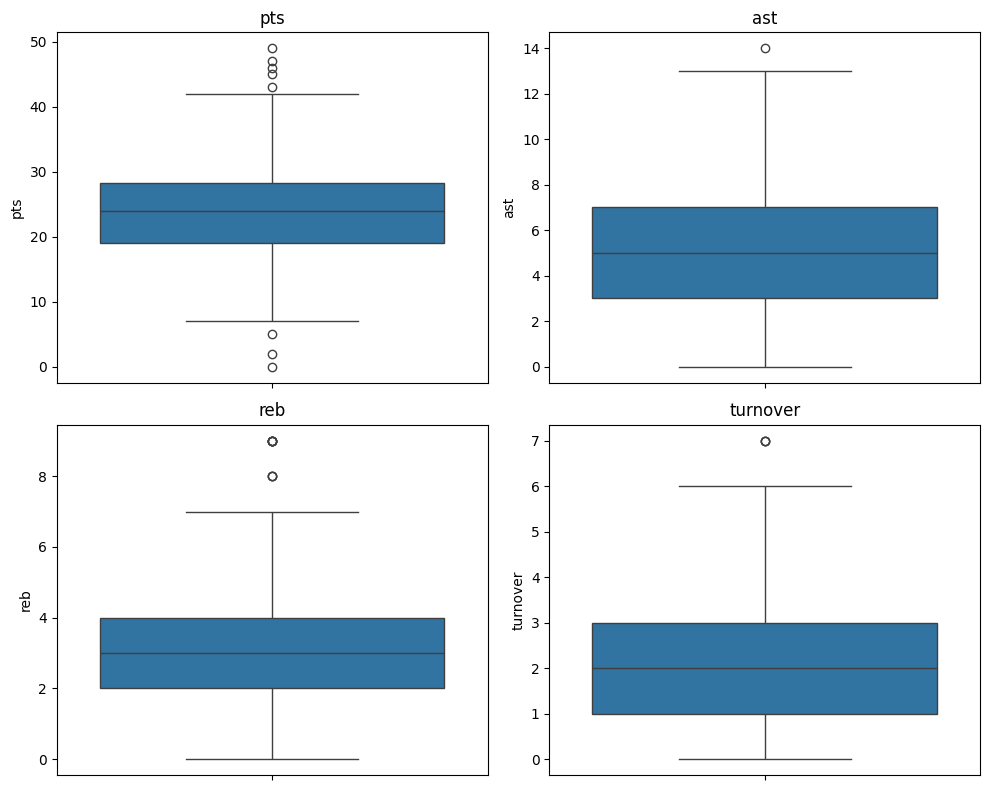

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['pts', 'ast', 'reb', 'turnover']

plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=kyrie_irving_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

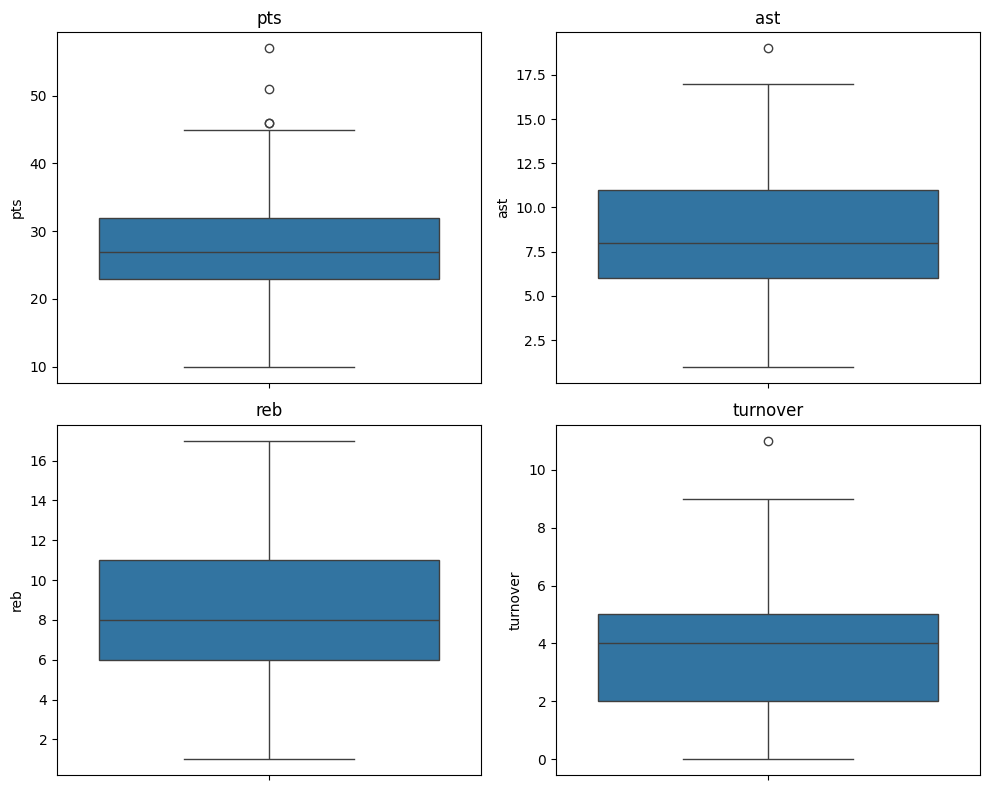

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['pts', 'ast', 'reb', 'turnover']

plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(y=lebron_james_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

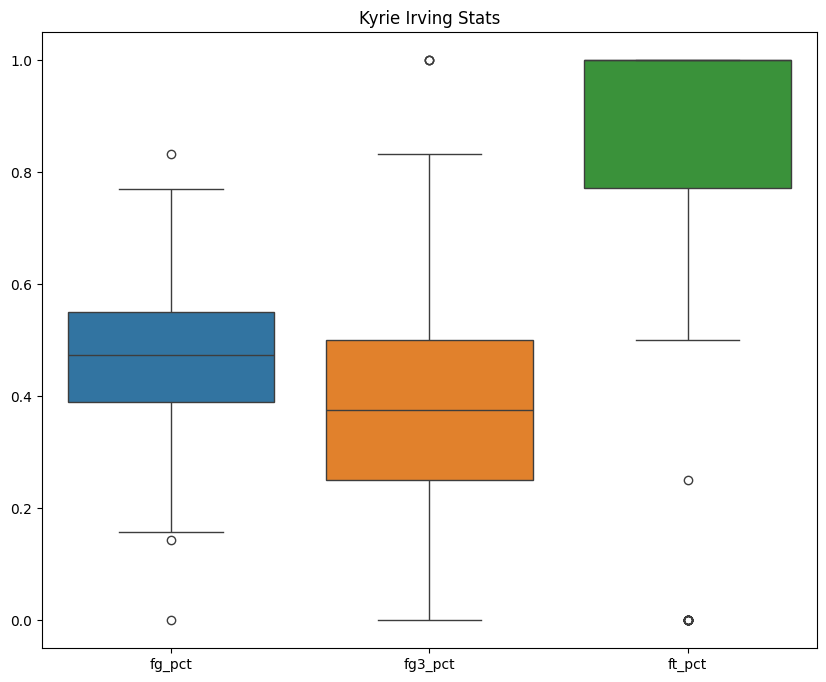

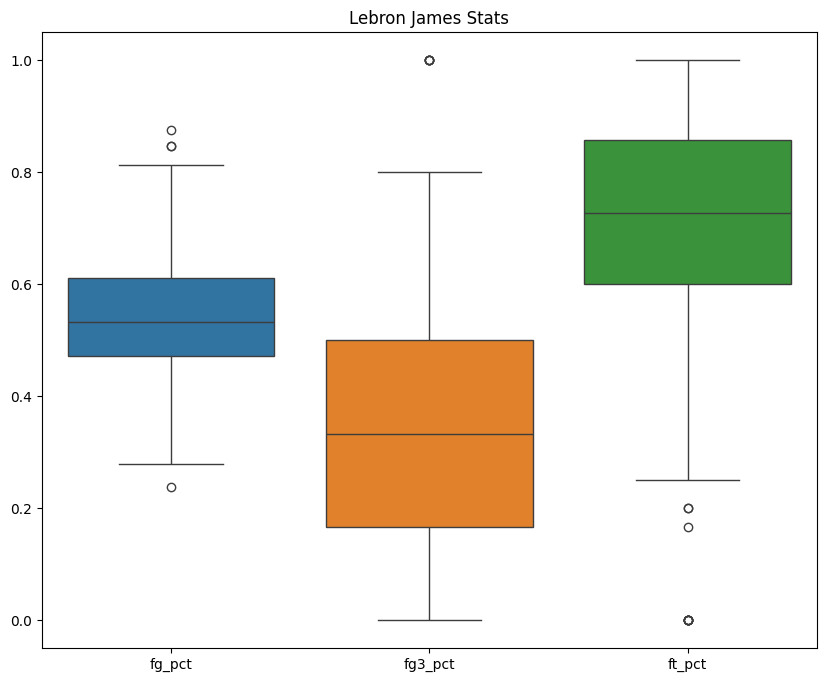

In [26]:
# Boxplot of percentages for both players
plt.figure(figsize=(10, 8))
sns.boxplot(data=kyrie_irving_df[['fg_pct', 'fg3_pct', 'ft_pct']])
plt.title('Kyrie Irving Stats')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=lebron_james_df[['fg_pct', 'fg3_pct', 'ft_pct']])
plt.title('Lebron James Stats')
plt.show()

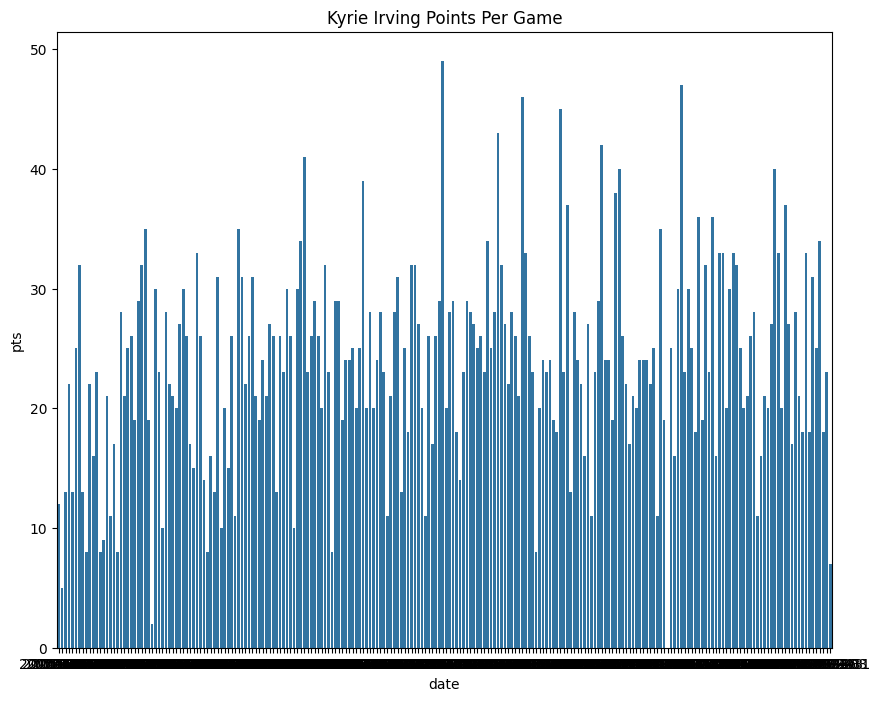

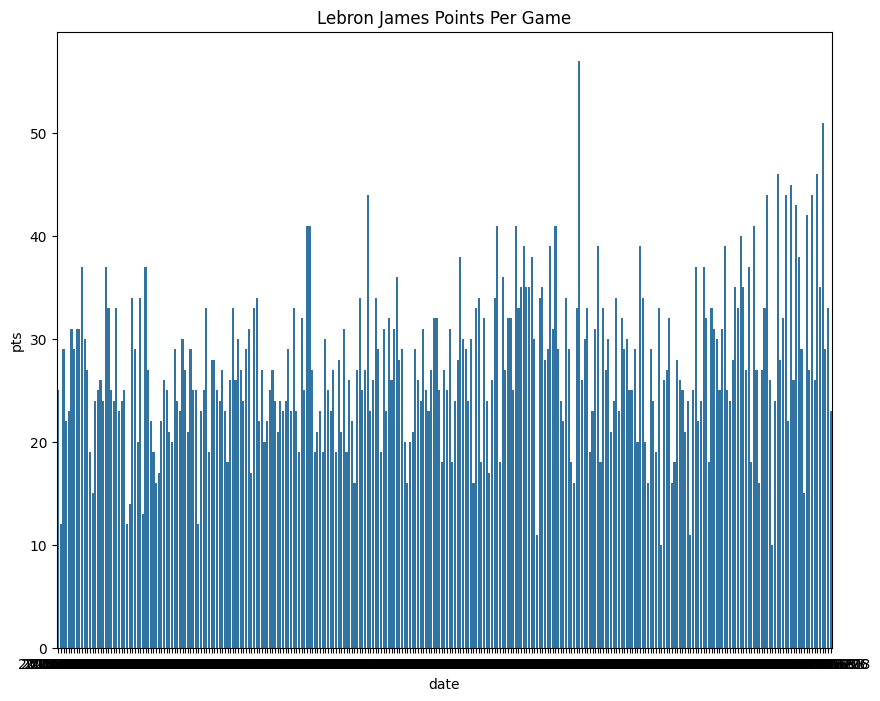

In [28]:
# Line graph of both players points per game
plt.figure(figsize=(10, 8))
sns.barplot(x='date', y='pts', data=kyrie_irving_df)
plt.title('Kyrie Irving Points Per Game')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='date', y='pts', data=lebron_james_df)
plt.title('Lebron James Points Per Game')
plt.show()

In [23]:
# Convert 'min' from "MM:SS" to total minutes as a float
kyrie_irving_df['total_min'] = kyrie_irving_df['min'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60 if isinstance(x, str) else None)
lebron_james_df['total_min'] = lebron_james_df['min'].apply(lambda x: float(x.split(':')[0]) + float(x.split(':')[1])/60 if isinstance(x, str) else None)

lebron_james_df

,id,date,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,...,fta,ftm,min,oreb,pf,pts,reb,stl,turnover,total_min
1,31090,2015-10-27,5.0,0.0,10.0,0.200,5.0,1.0,0.545,22.0,...,3.0,0.0,36:04,0.0,3.0,25.0,10.0,1.0,1.0,36.066667
2,31093,2015-10-28,5.0,0.0,6.0,0.000,3.0,0.0,0.308,13.0,...,8.0,4.0,30:48,1.0,1.0,12.0,7.0,3.0,3.0,30.800000
3,28882,2015-10-30,4.0,0.0,3.0,0.000,2.0,0.0,0.684,19.0,...,5.0,3.0,33:56,2.0,3.0,29.0,5.0,1.0,4.0,33.933333
4,28664,2015-11-02,11.0,2.0,9.0,0.000,3.0,0.0,0.474,19.0,...,4.0,4.0,33:20,0.0,3.0,22.0,9.0,4.0,3.0,33.333333
5,28666,2015-11-04,3.0,1.0,3.0,0.200,5.0,1.0,0.391,23.0,...,7.0,4.0,35:04,2.0,1.0,23.0,5.0,4.0,3.0,35.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,33301,2018-05-27,9.0,2.0,15.0,0.375,8.0,3.0,0.500,24.0,...,11.0,8.0,48:00,0.0,4.0,35.0,15.0,0.0,8.0,48.000000
300,33719,2018-05-31,8.0,1.0,4.0,0.429,7.0,3.0,0.594,32.0,...,11.0,10.0,47:32,4.0,2.0,51.0,8.0,1.0,5.0,47.533333
301,33720,2018-06-03,13.0,0.0,8.0,0.500,4.0,2.0,0.500,20.0,...,9.0,7.0,43:51,1.0,2.0,29.0,9.0,2.0,5.0,43.850000
302,33721,2018-06-06,11.0,2.0,7.0,0.167,6.0,1.0,0.464,28.0,...,7.0,6.0,46:52,3.0,2.0,33.0,10.0,2.0,4.0,46.866667


In [24]:
# Convert both dataframes to csv files
kyrie_irving_df.to_csv(r'kyrie_irving_df.csv', index = False) 
lebron_james_df.to_csv(r'lebron_james_df.csv', index = False)